# The Big Bang Theory: Understanding Success

Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### Team Members Names:  Zachary Wieselthier, Laura Martin, Sean Worth, Ryan Nicholls


In [0]:
!pip install pystan

In [2]:
#Import Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro #normallity test
from scipy.stats import mstats
from fbprophet import Prophet


#Import Data and Create Data Frame
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
link = 'https://drive.google.com/open?id=1iqMdXd1miOTttqeRmY9MgrJetmrelGEW' 
fluff, id = link.split('=')

# Dataset is now stored in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Big Bang_Pub.csv')  
bb = pd.read_csv('Big Bang_Pub.csv')
bb.head(4)


/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www

,ID,Title,Director,Writer,Original Air Date,Rating,Leonard,Sheldon,Penny,Howard,...,Leslie,Bernadette,Amy,Stuart,Emily,Mary,Zack,Bert,Janine,Wil
0,1_1,"""Pilot""",James Burrows,Chuck Lorre & Bill Prady,9/24/2007,8.4,124,105,60,17,...,0,0,0,0,0,0,0,0,0,0
1,1_2,"""The Big Bran Hypothesis""",Mark Cendrowski,Chuck Lorre & Bill Prady,10/1/2007,8.4,87,71,41,17,...,0,0,0,0,0,0,0,0,0,0
2,1_3,"""The Fuzzyboots Corollary""",Mark Cendrowski,Chuck Lorre,10/8/2007,7.9,104,50,38,27,...,0,0,0,0,0,0,0,0,0,0
3,1_4,"""The Luminous Fish Effect""",Mark Cendrowski,Chuck Lorre & Bill Prady,10/15/2007,8.3,47,83,30,6,...,0,0,0,0,0,0,0,0,0,0


### Descriptive Statistics

In [0]:
#Calculate Mean
avg_rating = bb["Rating"].mean() 
#Calculate Median
med_rating =bb['Rating'].median() 
#Calculate total number of episodes
count_episodes = bb['ID'].count() 
from scipy.stats import shapiro
#Print Results
print 'Descriptive Statistics'
print'==================================='
print 'Average Episode Rating =', ("%.2f" % avg_rating)
print 'Median Episode Rating =',  med_rating
print 'Total number of Episodes =', count_episodes
print''
print 'Normallity'
print'==================================='
stat, p = shapiro(bb['Rating'])
print 'p = ', p
if p<.05:
   print 'Failed Normallity Test'


Descriptive Statistics
Average Episode Rating = 8.04
Median Episode Rating = 8.1
Total number of Episodes = 231

Normallity
p =  0.0210606940091
Failed Normallity Test


The average episode rating is a 8.04 and the median is a 8.1.

Population size is 231 episodes.

The rating does not follow a normal distribution tested by the Shapiro Wilk test resulting in a P value of .021 which is less than the alpha value of .05. 

Text(0.5,0,u'Rating')

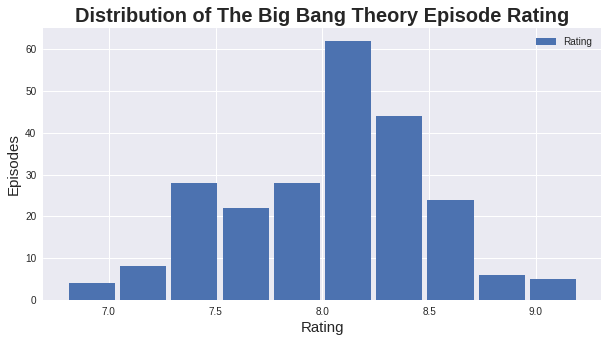

In [0]:
x = bb[['Rating']]

#Plotting graph
x.plot.hist(figsize=(10,5),grid=True, bins=10, rwidth=.9) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Distribution of The Big Bang Theory Episode Rating', fontsize=20, fontweight='bold')
plt.ylabel('Episodes', fontsize=15)
plt.xlabel('Rating', fontsize=15)

By plotting a histogram to visualize the distribution of ratings per episode, we can observe that the data is slightly right, and follows a near bimodal distribution. Most of the episodes ratings fall between 8.0 and 8.5, while some ratings were as low as 6.8 and as high as 9.2. In descriptive statistics the difference between the average and the median episode rating is another representation of normality. The difference is .17 which is very small, yet it is non normal.  


In [0]:
#Defining Independent Variables
X = bb[['Leonard', 'Sheldon', 'Penny', 'Howard', 'Raj',	'Leslie',	'Bernadette',
        'Amy', 'Stuart', 'Emily',	'Mary',	'Zack',	'Bert',	'Janine', 'Wil']]   

X.sum() 

Leonard       10018
Sheldon       11905
Penny          7690
Howard         5953
Raj            4736
Leslie          107
Bernadette     2682
Amy            3512
Stuart          732
Emily           164
Mary             61
Zack            133
Bert             97
Janine           31
Wil             124
dtype: int64

### Linear Regression - Character Lines

In [0]:
#Defining Dependent Variable
Y = bb['Rating']     

#Defining Independent Variables
X = bb[['Leonard', 'Sheldon', 'Penny', 'Howard', 'Raj',	'Leslie',	'Bernadette',
        'Amy', 'Stuart', 'Emily',	'Mary',	'Zack',	'Bert',	'Janine', 'Wil']]   
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     5.952
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.62e-10
Time:                        18:28:14   Log-Likelihood:                -105.84
No. Observations:                 231   AIC:                             243.7
Df Residuals:                     215   BIC:                             298.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3528      0.211     39.606      0.0

A linear regression was used to understand the correlation between a characters presents and the episode’s rating; the more lines a character speaks the more presence they have in an episode.The regression resulted statistically significant with a P value of .000, suggesting that character presence has an impact on the rating of an episode. 

However, the model’s low R^2 value of .293 means that only 29% of the variance can be explained from characters speaking roles. There are other factors that explain a majority of the variance in an episodes rating.The majority of individual characters do not have a statistically significant correlation on the episodes rating based on having P values greater than the alpha of .05. 

Although, The characters that did result in statistical significance were Raj, Bernadette, Amy, Stuart and Bert with P values of .023, .001, .003, .011 and .021, respectively. Moreover, they all had negative corresponding coefficients of -.005, -.011, -.007, -.010 and -.023 respectively. This evidence tells us that there presence causes a negative impact on episode rating. 


### Visualization:


Text(0.5,1.02,u'Signigicant Characters Pair Plots for The Big Bang Theory')

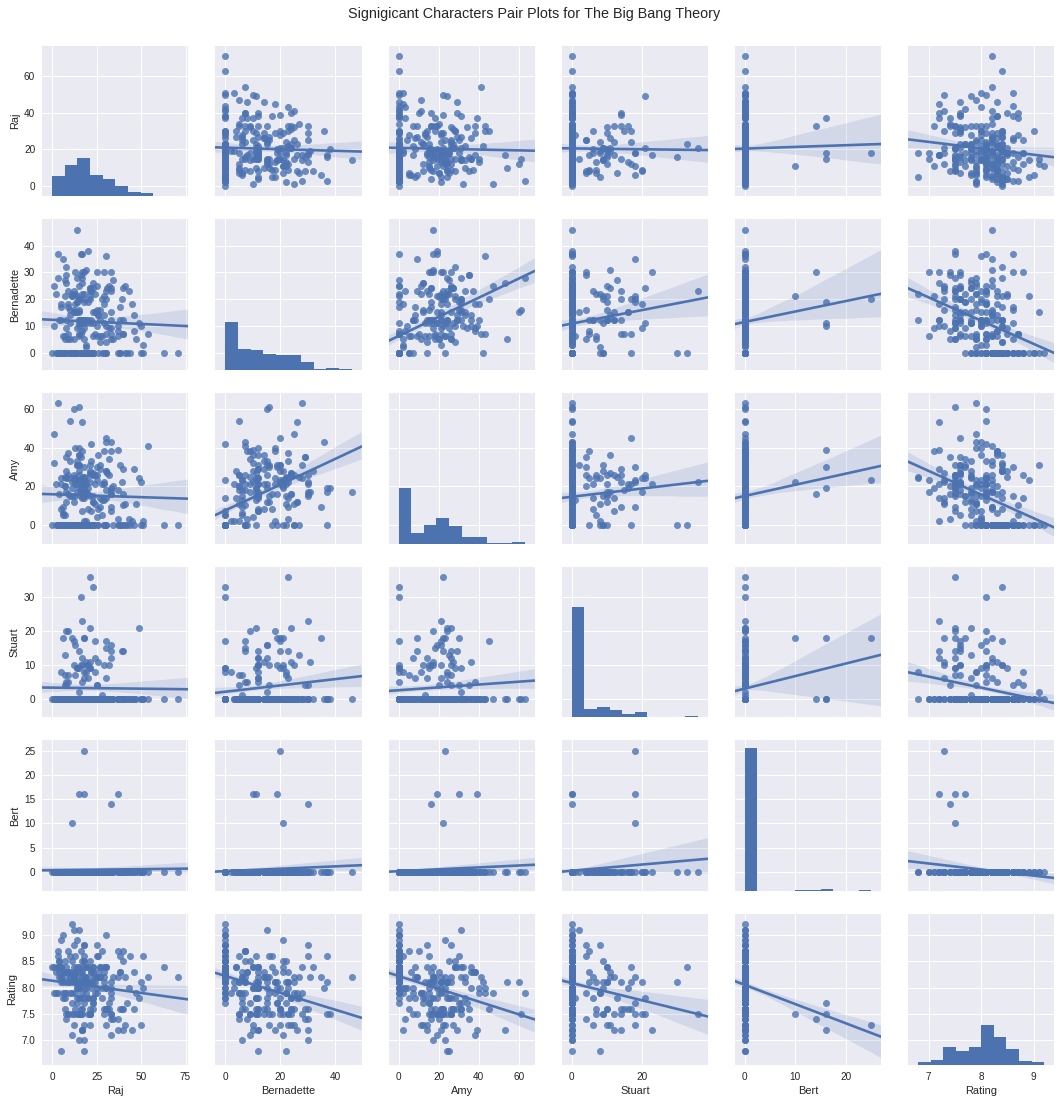

In [0]:
#In the regression table we found 5 characters with a statistical significance to the rating: Raj, Bernadette, Amy, Stuart and Bert. 

#Raj, Bernadette, Amy, Stuart and Bert compared to rating
lines_Rating = bb[['Raj','Bernadette', 'Amy', 'Stuart','Bert', 'Rating']]

#Regression visual on significant characters vs rating
sns.pairplot(lines_Rating, kind='reg') 
plt.suptitle('Signigicant Characters Pair Plots for The Big Bang Theory', y=1.02)

As we have stated before, In the regression table it was found that five characters contributed a negative significance to the rating: Raj, Bernadette, Amy, Stuart and Bert. A pairplot was run to visualize the slope of the regression line.

### Director Hypothesis Test

In [0]:
#Kruskal Wallis H-test
import numpy as np
from scipy.stats import mstats

AR = bb.loc[bb['Director'] == "Anthony Rich"]
AR = AR['Rating'].values


MC = bb.loc[bb['Director'] == "Mark Cendrowski"]
MC = MC['Rating'].values


PC = bb.loc[bb['Director'] == "Peter Chakos"]
PC = PC['Rating'].values

other = bb.loc[(bb['Director'] != 'Anthony Rich') & (bb['Director'] != 'Peter Chakos') & (bb['Director'] != 'Mark Cendrowski') ]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(AR, MC, PC, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")


Kruskal Wallis H-test test:
('H-statistic:', 3.994005428158633)
('P-Value:', 0.2621121633880659)
Fail to reject null hypothesis


The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. Non parametric means that the test doesn’t assume your data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA aren’t met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this test is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will tell you if there is a significant difference between groups.

The groupings were made in excel on a pivot table. Directors who directed five times or less are grouped as other and everyone else above five is in their own individual group.In this case we failed to reject the null hypothesis which means our groups are similar. The data suggests directors has an impact on rating. 


### Writer Hypothesis Test

Kruskal Wallis H-test test:
('H-statistic:', 10.814552640990419)
('P-Value:', 0.012772111562943719)
Reject null hypothesis - Significant differences exist between groups.

Writer Averages:
Chuck Lorre: 8.233333333333333
Chuck Lorre & Bill Prady: 8.500000000000002
Chuck Lorre & Eric Kaplan & Jim Reynolds: 7.971428571428571
Other <5 episodes: 8.017535545023696



Text(0.5,0,u'Writer')

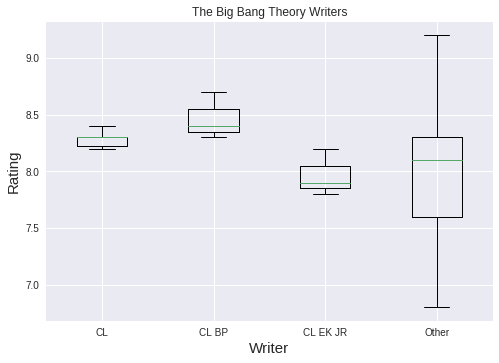

In [0]:
import numpy as np
from scipy.stats import mstats
CL = bb.loc[bb['Writer'] == "Chuck Lorre"]
CL = CL['Rating'].values


CLBP = bb.loc[bb['Writer'] == "Chuck Lorre & Bill Prady"]
CLBP = CLBP['Rating'].values


CLEKJR = bb.loc[bb['Writer'] == "Chuck Lorre & Eric Kaplan & Jim Reynolds"]
CLEKJR = CLEKJR['Rating'].values

other = bb.loc[(bb['Writer'] != 'Chuck Lorre') & (bb['Writer'] != 'Chuck Lorre & Bill Prady') & (bb['Writer'] != 'Chuck Lorre & Eric Kaplan & Jim Reynolds') ]
other = other['Rating'].values
other


H, pval = mstats.kruskalwallis(CL, CLBP, CLEKJR, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")
print ''
print 'Writer Averages:'
print 'Chuck Lorre:', CL.mean()
print 'Chuck Lorre & Bill Prady:', CLBP.mean()
print 'Chuck Lorre & Eric Kaplan & Jim Reynolds:', CLEKJR.mean()
print 'Other <5 episodes:', other.mean()
print''
import matplotlib.pyplot as plt  
data_to_plot = [CL, CLBP, CLEKJR, other]
plt.boxplot(data_to_plot)
plt.xticks([1, 2, 3, 4], ['CL', 'CL BP', 'CL EK JR', 'Other'])
plt.title('The Big Bang Theory Writers')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Writer', fontsize=15)

The Kruskal Wallis test is the non parametric alternative to the One Way ANOVA. Non parametric means that the test doesn’t assume your data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA aren’t met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this test is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will tell you if there is a significant difference between groups.

The groupings were made in excel on a pivot table. Writer who wrote five times or less are grouped as other and everyone else above five is in their own individual group.In this case we reject the null hypothesis which means our groups are not similar. The data suggests writers does not have an impact on rating. 




### Box and Wisker Plot

Text(0.5,0,u'Character')

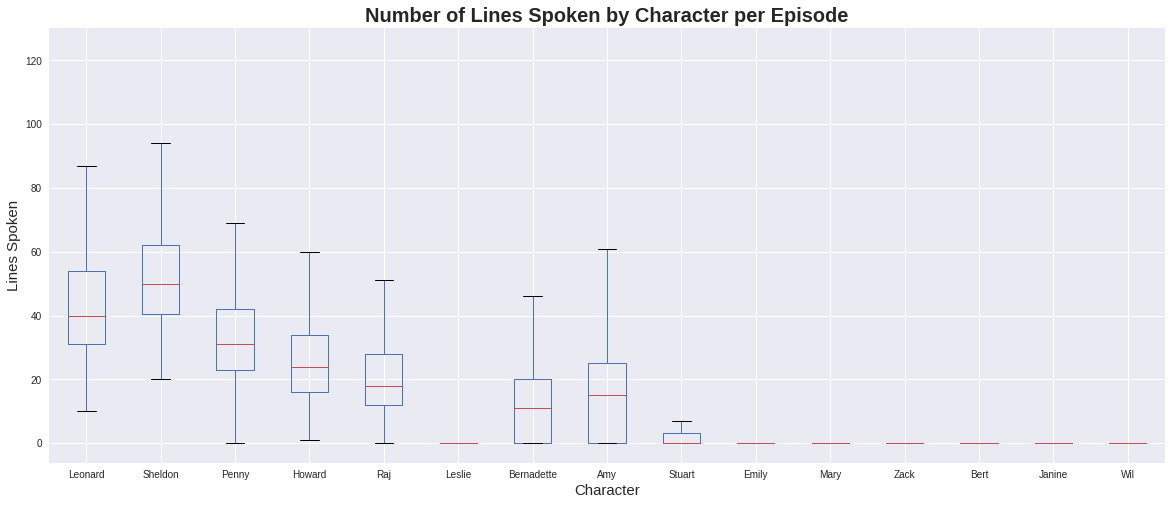

In [0]:
#Box Plot Number of lines spoken by each main character

lines = bb[['Leonard', 'Sheldon', 'Penny', 'Howard', 'Raj',	'Leslie',	'Bernadette',
        'Amy', 'Stuart', 'Emily',	'Mary',	'Zack',	'Bert',	'Janine', 'Wil']]

#Plotting graph
lines.boxplot(figsize=(20,8)) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Number of Lines Spoken by Character per Episode',fontsize=20, fontweight='bold')
plt.ylabel('Lines Spoken', fontsize=15)
plt.xlabel('Character', fontsize=15) 

By using a boxplot to visualize the distribution of the number of lines spoken by each character per episode, we can see that the five main characters, Leonard, Sheldon, Penny, Howard and Raj spoke most of the lines and had a varying median ranging between 18 to 50 lines. We can also observe that Leonard, Sheldon, Penny, Howard and Raj have almost the same distribution.



#Time Series

In [3]:
bb.rename(columns={'Original Air Date':'ds',
                          'Rating':'y'}, 
                 inplace=True)
bb.head(3)

,ID,Title,Director,Writer,ds,y,Leonard,Sheldon,Penny,Howard,...,Leslie,Bernadette,Amy,Stuart,Emily,Mary,Zack,Bert,Janine,Wil
0,1_1,"""Pilot""",James Burrows,Chuck Lorre & Bill Prady,9/24/2007,8.4,124,105,60,17,...,0,0,0,0,0,0,0,0,0,0
1,1_2,"""The Big Bran Hypothesis""",Mark Cendrowski,Chuck Lorre & Bill Prady,10/1/2007,8.4,87,71,41,17,...,0,0,0,0,0,0,0,0,0,0
2,1_3,"""The Fuzzyboots Corollary""",Mark Cendrowski,Chuck Lorre,10/8/2007,7.9,104,50,38,27,...,0,0,0,0,0,0,0,0,0,0


In [0]:
model = Prophet()
model.fit(bb)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
591,2018-05-07
592,2018-05-08
593,2018-05-09
594,2018-05-10
595,2018-05-11


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
591,2018-05-07,7.358408,6.968080,7.756617
592,2018-05-08,7.280194,6.892735,7.661579
593,2018-05-09,6.811982,6.430913,7.218668
594,2018-05-10,7.519681,7.142298,7.909750
595,2018-05-11,7.356652,6.993980,7.759756


Text(0.5,33,u'Year')

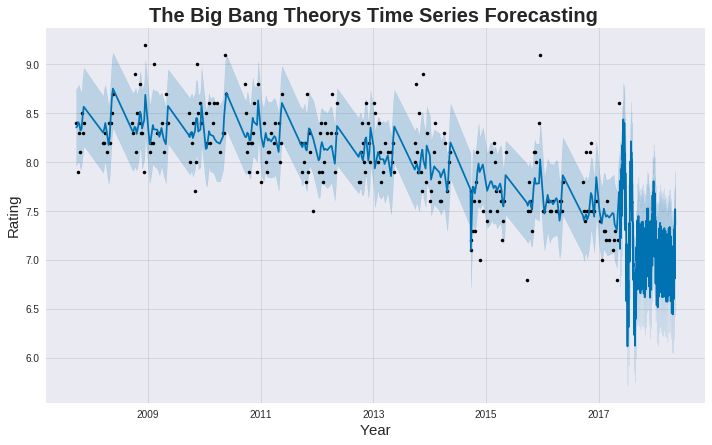

In [0]:
fig1 = model.plot(forecast)
plt.title('The Big Bang Theorys Time Series Forecasting ',fontsize=20, fontweight='bold')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Year', fontsize=15)

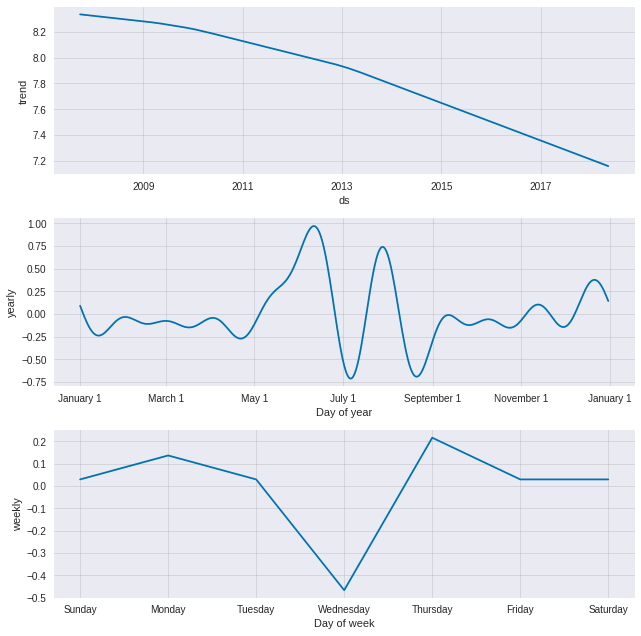

In [0]:
fig2 = model.plot_components(forecast)

Text(0.5,0,u'Episode')

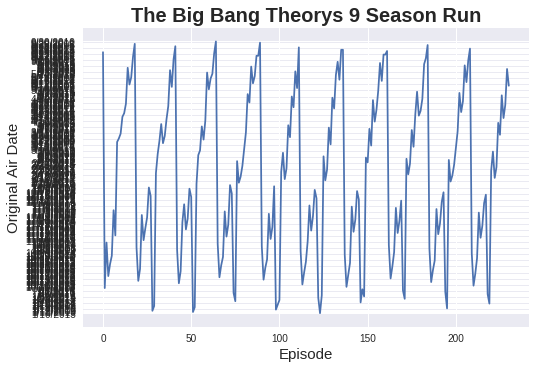

In [0]:
#Checking stationarity of time series
ts = bb['ds']

plt.plot(ts)
plt.title('The Big Bang Theorys 9 Season Run',fontsize=20, fontweight='bold')
plt.ylabel('Original Air Date', fontsize=15)
plt.xlabel('Episode', fontsize=15) 

#Forcasting

###Preparing Data

In [0]:
df_x = bb.drop(columns = ['ID', 'Title', 'ds','y', 'Director', 'Writer'])
df_y = bb['y']

In [70]:
#One Hot Director
dir_one_hot = pd.get_dummies(bb['Director'])
dir_one_hot.columns = dir_one_hot.columns.str.lower()
dir_one_hot.head(1)

,andrew d. weyman,anthony rich,gay linvill,howard murray,james burrows,joel murray,mark cendrowski,nikki lorre,peter chakos,ted wass
0,0,0,0,0,1,0,0,0,0,0


In [0]:
number = bb.ID.count()

i = 0
while i < number:
  if (bb.loc[i,'Writer'] != 'Chuck Lorre') and (bb.loc[i,'Writer'] != 'Chuck Lorre & Bill Prady') and (bb.loc[i,'Writer'] != 'Chuck Lorre & Eric Kaplan & Jim Reynolds'):
    bb.loc[i,'Upd_Writer'] = 'Other'
  else:
    bb.loc[i,'Upd_Writer']  = bb.loc[i,'Writer']
  i = i+1   

In [72]:
wir_one_hot = pd.get_dummies(bb['Upd_Writer'])
wir_one_hot.columns = wir_one_hot.columns.str.upper()
bb =bb.drop(columns = ['Upd_Writer'])
wir_one_hot.head(1)


,CHUCK LORRE,CHUCK LORRE & BILL PRADY,CHUCK LORRE & ERIC KAPLAN & JIM REYNOLDS,OTHER
0,0,1,0,0


In [73]:
# Combines one Hots to Lines Spoken
df_x = df_x.join(dir_one_hot)
df_x = df_x.join(wir_one_hot)

df_x.head(1)

,Leonard,Sheldon,Penny,Howard,Raj,Leslie,Bernadette,Amy,Stuart,Emily,...,james burrows,joel murray,mark cendrowski,nikki lorre,peter chakos,ted wass,CHUCK LORRE,CHUCK LORRE & BILL PRADY,CHUCK LORRE & ERIC KAPLAN & JIM REYNOLDS,OTHER
0,124,105,60,17,3,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [0]:
from google.colab import files
df_x.to_csv("data.csv")
files.download("data.csv")

In [0]:
#Seperates Data for training and testing
import sklearn
from sklearn import model_selection
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_x,df_y,test_size = .3, random_state = 2)

###Linear Regression

In [75]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


param_grid = dict(fit_intercept = ['True', 'False'])


grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.487014 using {'fit_intercept': 'True'}


Score:  -0.139970911576774
Mean Squared Error:  0.18574779092081883
----------------------------------------------------------------


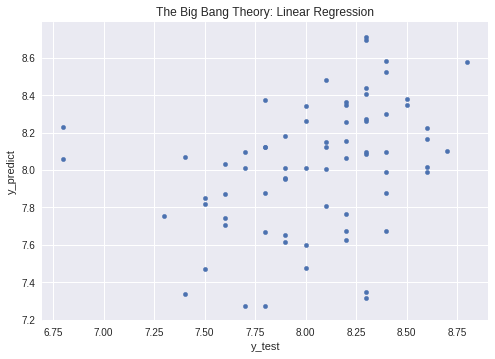

In [78]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = 'True')
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory: Linear Regression')

### K Neighbors Regression

In [81]:
from sklearn import metrics
n_neighbors = range(3,15)
leaf_size = range(25,35)
p=[1,2]

param_grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size)


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.491373 using {'n_neighbors': 14, 'leaf_size': 25}


Score:  0.176367494681394
Mean Squared Error:  0.13420335276967923
----------------------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


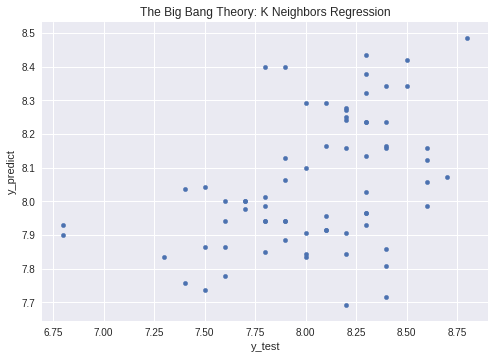

In [80]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=14, leaf_size = 25)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory: K Neighbors Regression')

###Stochastic Gradient Descent Regression

In [82]:
from sklearn import metrics
import numpy


param_grid = dict(loss = [
    'squared_loss',
    'huber',
    'epsilon_insensitive', 
    'squared_epsilon_insensitive'
], max_iter = numpy.arange(100,2000,50))


grid_search = GridSearchCV(linear_model.SGDRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.857324 using {'loss': 'huber', 'max_iter': 1400}


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Score:  -7.220832433087493
Mean Squared Error:  1.339509147530895
----------------------------------------------------------------


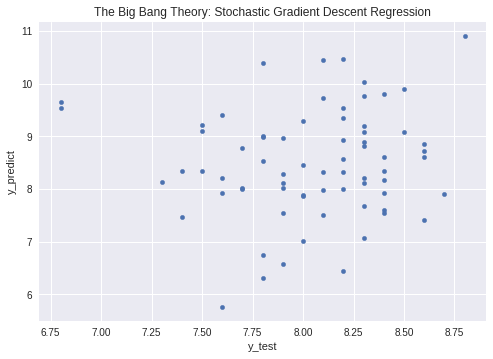

In [83]:
model = linear_model.SGDRegressor(loss = 'huber', max_iter = 1400)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory: Stochastic Gradient Descent Regression')

### Decision Tree

In [84]:
from sklearn import metrics
from sklearn import tree

param_grid = dict(max_depth = range(2,30))


grid_search = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.446047 using {'max_depth': 3}


Score:  0.1731568334191962
Mean Squared Error:  0.13472650053668972
-----------------a-----------------------------------------------


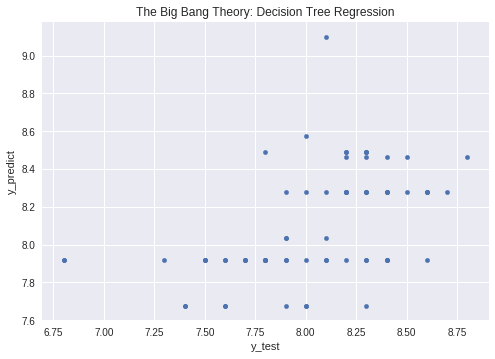

In [85]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory: Decision Tree Regression')

### Neural Network

In [87]:
from sklearn import metrics
from sklearn import neural_network
import numpy

param_grid = dict(hidden_layer_sizes = numpy.arange(80, 500, 20),
                 activation = ['identity', 'logistic', 'tanh', 'relu'])


grid_search = GridSearchCV(sklearn.neural_network.MLPRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.548412 using {'activation': 'logistic', 'hidden_layer_sizes': 120}


Score:  -0.0505847289916137
Mean Squared Error:  0.1711831333620805
-----------------a-----------------------------------------------


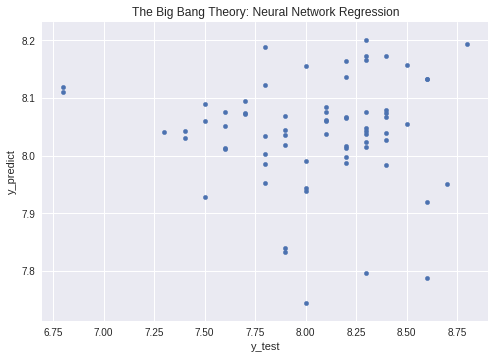

In [88]:
from sklearn import neural_network
model = sklearn.neural_network.MLPRegressor(activation = 'logistic', hidden_layer_sizes = 120)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory: Neural Network Regression')

###Decision Forrest

In [90]:
from sklearn import metrics
from sklearn import ensemble
import numpy

param_grid = dict(n_estimators = numpy.arange(5,100,5), max_depth = numpy.arange(2,30) )


grid_search = GridSearchCV(sklearn.ensemble.RandomForestRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.410206 using {'n_estimators': 15, 'max_depth': 4}


Score:  0.17258505116011513
Mean Squared Error:  0.13481966720474542
----------------------------------------------------------------


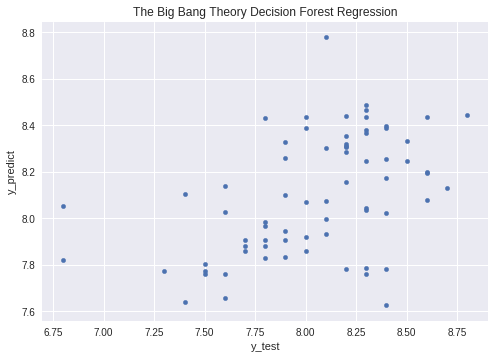

In [91]:
from sklearn import ensemble


model = sklearn.ensemble.RandomForestRegressor(n_estimators = 15, max_depth = 4)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'The Big Bang Theory Decision Forest Regression')

